# Survival Volume

Author: Matthew Wakefield

SurvivalVolume is a small python package containing a set of convenience functions for parsing tumour volume time course data and plotting line graphs with Matplotlib and Kaplan Meier curves with the package Lifelines

This is a quick guide to usage

## Installation

For a simple install using the release version of mpld3 you can either install from the Python Package Index (PyPI)

`pip3 install survivalvolume`

or from the github repository

`pip3 install git+https://github.com/genomematt/survivalvolume.git`

To run the tests use

`python3 -m survivalvolume.tests.test_all`

It is also recommended to run the user_guide.ipynb file and visually compare it to the html version

## Parsing
There are currently no full example files in the repository for StudyLog; however, there is a very minimal file used for testing which demonstrates how this function works

In [2]:
from survivalvolume.parse import studylog_prism_to_tv_tables
tvts = studylog_prism_to_tv_tables('survivalvolume/tests/data/Studylogish.xlsx')

In [3]:
tvts['Treat']

18,T
Day,
1,230.79
4,194.62
8,161.48


#### Importing all files from a folder
The following example shows how to import a collection of related tsv (tab separated value) files from a folder and read them into a dictionary of data frames.

In [4]:
import pandas
import pathlib
p = pathlib.Path('survivalvolume/tests/data').glob('*.tsv')

parsed_data = {filename.stem:pandas.read_table(filename.as_posix(), sep='\t',index_col=0) for filename in p}
parsed_data['good_treatment']



,1231,1232,1233,1234,1235
1,196.651127,229.118066,183.526092,234.028491,258.094495
4,153.771686,194.616465,258.153781,207.218985,262.370527
8,256.298156,361.942687,206.069331,237.849554,310.116141
11,233.545130,NaN,201.558526,219.750465,NaN
15,206.667291,NaN,221.677633,233.408585,NaN
18,150.125937,NaN,177.526944,233.310291,NaN
22,172.975654,NaN,231.332705,288.396148,NaN
25,205.492510,NaN,136.546338,245.922816,NaN
29,126.566408,NaN,121.945818,146.358947,NaN
32,145.558378,NaN,106.513885,314.243293,NaN


If you have parsed data from a clumsy or proprietary format you may wish to export your data to tab separated value files as a clean and future proof backup option

In [5]:
from survivalvolume.tests.test_data import test_data

def save_dict_of_dataframes(dodf, dir_name='.'):
    for key in dodf:
        dodf[key].to_csv('{0}/{1}.tsv'.format(dir_name,key),sep='\t')
    pass

save_dict_of_dataframes(test_data, 'survivalvolume/tests/data')


In [6]:
from survivalvolume.tests.test_data import test_data
test_data['vehicle']

,6661,6663,6664,6665,6666,6667,6668,6669
1,181.22,261.01,204.29,219.89,189.20,211.23,209.51,207.047
4,277.63,552.57,344.84,243.41,278.13,199.20,317.32,270.520
8,300.63,414.30,346.97,592.57,274.69,154.58,276.04,265.350
11,570.15,557.21,351.16,416.23,347.82,317.42,244.11,276.190
15,584.07,725.49,575.32,725.89,507.35,326.65,225.95,300.780
18,841.32,NaN,647.39,NaN,322.61,594.09,338.84,530.200
22,NaN,NaN,618.77,NaN,729.18,411.46,492.96,342.980
25,NaN,NaN,856.63,NaN,NaN,NaN,337.02,488.180
29,NaN,NaN,NaN,NaN,NaN,NaN,579.10,364.790
32,NaN,NaN,NaN,NaN,NaN,NaN,836.56,919.840


In [7]:
test_data['vehicle'].to_csv()

',6661,6663,6664,6665,6666,6667,6668,6669\n1,181.22,261.01,204.29,219.89,189.2,211.23,209.51,207.047\n4,277.63,552.57,344.84,243.41,278.13,199.2,317.32,270.52\n8,300.63,414.3,346.97,592.57,274.69,154.58,276.04,265.35\n11,570.15,557.21,351.16,416.23,347.82,317.42,244.11,276.19\n15,584.07,725.49,575.32,725.89,507.35,326.65,225.95,300.78\n18,841.32,,647.39,,322.61,594.09,338.84,530.2\n22,,,618.77,,729.18,411.46,492.96,342.98\n25,,,856.63,,,,337.02,488.18\n29,,,,,,,579.1,364.79\n32,,,,,,,836.56,919.84\n'

Biweekly measurement can sometimes result in inconsistent data due to the alternating offset of days.  There is a convenience function in `survivalvolume.parse` `standardise_days` that allows easy renumbering to an alternating pattern

In [8]:
from survivalvolume.parse import standardise_days
standardise_days(test_data['vehicle'])

,6661,6663,6664,6665,6666,6667,6668,6669
1,181.22,261.01,204.29,219.89,189.20,211.23,209.51,207.047
4,277.63,552.57,344.84,243.41,278.13,199.20,317.32,270.520
8,300.63,414.30,346.97,592.57,274.69,154.58,276.04,265.350
11,570.15,557.21,351.16,416.23,347.82,317.42,244.11,276.190
15,584.07,725.49,575.32,725.89,507.35,326.65,225.95,300.780
18,841.32,NaN,647.39,NaN,322.61,594.09,338.84,530.200
22,NaN,NaN,618.77,NaN,729.18,411.46,492.96,342.980
25,NaN,NaN,856.63,NaN,NaN,NaN,337.02,488.180
29,NaN,NaN,NaN,NaN,NaN,NaN,579.10,364.790
32,NaN,NaN,NaN,NaN,NaN,NaN,836.56,919.840


In [9]:
help(standardise_days)

Help on function standardise_days in module survivalvolume.parse:

standardise_days(dataframe, first_interval=3, second_interval=4)
    Renumber days in study log files by changing
    day numbers to series incrementing by alternating periods.
    (eg 3 day and 4 day periods) to adjust for individuals going
    on study on different days of the week.
    
    Arguments:
    
        dataframe          -  a pandas data frame with a
                              day based row index
        first_interval     -  the magnitude of odd numbered steps
        second_interval    -  the magnitude of even numbered steps
    
    Returns:
    
        a pandas dataframe with standardised days as index.



In [10]:
standardise_days(test_data['vehicle'],first_interval=4,second_interval=3)

,6661,6663,6664,6665,6666,6667,6668,6669
1,181.22,261.01,204.29,219.89,189.20,211.23,209.51,207.047
5,277.63,552.57,344.84,243.41,278.13,199.20,317.32,270.520
8,300.63,414.30,346.97,592.57,274.69,154.58,276.04,265.350
12,570.15,557.21,351.16,416.23,347.82,317.42,244.11,276.190
15,584.07,725.49,575.32,725.89,507.35,326.65,225.95,300.780
19,841.32,NaN,647.39,NaN,322.61,594.09,338.84,530.200
22,NaN,NaN,618.77,NaN,729.18,411.46,492.96,342.980
26,NaN,NaN,856.63,NaN,NaN,NaN,337.02,488.180
29,NaN,NaN,NaN,NaN,NaN,NaN,579.10,364.790
33,NaN,NaN,NaN,NaN,NaN,NaN,836.56,919.840


## Interactive Line Plots

The plotting functions all use dataframe objects. As a study log sheet contains multiple tables the parser returns a dictionary of dataframes. To mimic this result object we will import a pre-canned set of test data from SurvivalVolume's tests.

In [11]:
# Tell the drawing package we want to see the output in the notebook
import matplotlib
%matplotlib inline
# Lots of warnings are being generated which gets a bit distracting so we will turn them off
import warnings
warnings.filterwarnings('ignore')

In [12]:
from survivalvolume.tests.test_data import test_data
test_data['vehicle']

,6661,6663,6664,6665,6666,6667,6668,6669
1,181.22,261.01,204.29,219.89,189.20,211.23,209.51,207.047
5,277.63,552.57,344.84,243.41,278.13,199.20,317.32,270.520
8,300.63,414.30,346.97,592.57,274.69,154.58,276.04,265.350
12,570.15,557.21,351.16,416.23,347.82,317.42,244.11,276.190
15,584.07,725.49,575.32,725.89,507.35,326.65,225.95,300.780
19,841.32,NaN,647.39,NaN,322.61,594.09,338.84,530.200
22,NaN,NaN,618.77,NaN,729.18,411.46,492.96,342.980
26,NaN,NaN,856.63,NaN,NaN,NaN,337.02,488.180
29,NaN,NaN,NaN,NaN,NaN,NaN,579.10,364.790
33,NaN,NaN,NaN,NaN,NaN,NaN,836.56,919.840


Our line plots are based around a TumourVolumePlot object that we will progressively update with data and plotting instructions

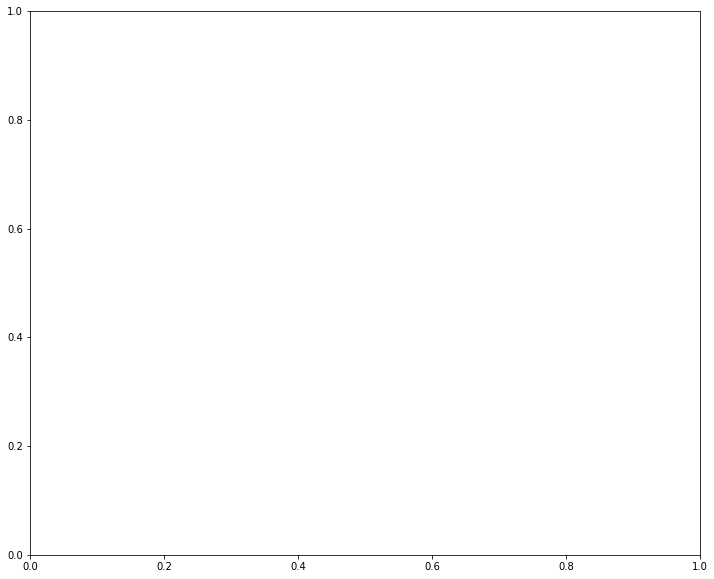

In [13]:
from survivalvolume.plot import TumourVolumePlot
tvp = TumourVolumePlot(figsize=(12,10))

There are three data types for a TumourVolumePlot, and you can build up a plot by adding instances of any combination of these data types.  Each time you add data the plot will update, and you can display each step as you build up to your final figure.

In [14]:
tvp.add_mean('Vehicle',test_data['vehicle'],color='blue')
tvp.display()

In [15]:
tvp.add_individuals('Vehicle',test_data['vehicle'],color='blue')
tvp.display()

Note that this plot is interactive.  When you hover your cursor over the lines for each individual you will see the line highlighted and additional information (the name of the individual).
You can also use the magnifying glass to zoom in on a section, the arrow tool to move the canvas, and the home button to return to the original view.

In [16]:
tvp.add_interval('Vehicle',test_data['vehicle'],color='blue')
tvp.display()

The interval that is plotted is the 95% confidence interval of the mean.  This is interpreted as the range in which the observed mean would lie 95% of the time with a random sample from the underlying normally distributed population that is estimated from the observed data.  It is not the same thing as the 95% confidence interval based on standard deviation - this shows the range in which 95% of the observations would lie given the estimate from the observed data.

When interpreting these graphs the spread of the individual observations provides the information on the range of observed values you would expect to see, and the interval the region in which we are confident the mean line would lie if we repeated the experiment.

Tests of differences in means are likely to be significant if the 95% confidence intervals of the means do not overlap, while significantly different means may overlap a two standard deviation range of observations. 


If you add additional data the plot will automatically rescale

In [17]:
tvp.add_mean('A treatment',test_data['other_treatment'],color='orange')
tvp.add_interval('A treatment',test_data['other_treatment'],color='orange')
tvp.add_individuals('A treatment',test_data['other_treatment'],color='orange')
tvp.display()

In [18]:
tvp.add_mean('Good treatment',test_data['good_treatment'],color='green')
tvp.add_interval('Good treatment',test_data['good_treatment'],color='green',alpha=0.1)
tvp.add_individuals('Good treatment',test_data['good_treatment'],color='green',dashes=[3,2,1,2])
tvp.display()

You can set the tite and axis labels on the TumourVolumePlot object

In [19]:
tvp.title = 'My Great Experiment'

You can work directly on the underlying matplotlib axis object if you need to adjust styles or set display limits

In [20]:
tvp.ax.set_xlim([0,100])
tvp.ax.set_ylim([0,1000])
tvp.ax.set_autoscaley_on(False)
tvp.display()

If you have multiple plots with the same legend you may wish to turn it off, which is simply achieved with an argument to display

In [21]:
tvp.display(legend=False)

In [22]:
tvp.xlim = [0,120]
tvp.display(legend=False)

You can save your output as interactive html, or as static pdf files

In [23]:
tvp.save_html('my great experiment.html')
tvp.save_pdf('my great experiment.pdf')

## Threshold for display of the mean
The confidence interval based on the standard error of the mean is only defined when there is more than one individual.  The mean of n=1 is valid; however, graphing a single individual as the mean can be visually misleading.
We set the threshold of display for the mean so that it is only displayed when n > 1.
This can be altered by setting a threshold value.

In [24]:
from survivalvolume.plot import TumourVolumePlot
tvp = TumourVolumePlot(figsize=(12,10))

tvp.add_mean('A treatment',test_data['other_treatment'],color='orange',threshold=0)

tvp.add_interval('A treatment',test_data['other_treatment'],color='orange')
tvp.add_individuals('A treatment',test_data['other_treatment'],color='orange')

tvp.display()

In [25]:
tvp = TumourVolumePlot(figsize=(12,10))

tvp.add_mean('A treatment',test_data['other_treatment'],color='orange')
tvp.add_individuals('A treatment',test_data['other_treatment'],color='orange', dashes = [1,1])
tvp.add_interval('A treatment',test_data['other_treatment'],color='orange')

tvp.add_mean('Vehicle',test_data['vehicle'],color='blue')
tvp.add_individuals('Vehicle',test_data['vehicle'],color='blue', dashes = [3,3])
tvp.add_interval('Vehicle',test_data['vehicle'],color='blue')

tvp.add_mean('Good Treatment',test_data['good_treatment'],color='green')
tvp.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
tvp.add_interval('Good Treatment',test_data['good_treatment'],color='green')

tvp.add_mean('Good Treatment',test_data['good_treatment'],color='green')
tvp.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
tvp.add_interval('Good Treatment',test_data['good_treatment'],color='green')

tvp.xlim = [0,100]
tvp.title = 'My Great Treatment Model'
tvp.ylabel = 'TV mm$^{3}$'
tvp.km_ylabel = 'Survival Probability'

tvp.display()

# Creating Kaplan Meier survival curves
We use lifelines, a package for drawing Kaplan Meier graphs and calculating statistical significance.  Helper functions convert the tumour volume measurements to survival tables that can then be plotted

In [26]:
# Lifelines uses matplotlib and to get it to show in a notebook we need to use the following commands
import matplotlib
%matplotlib inline

In [27]:
from survivalvolume.plot import make_km
kmfs = {}
for name in test_data:
    kmfs[name] = make_km(test_data[name], label=name)

print(kmfs.keys())

dict_keys(['other_treatment', 'vehicle', 'good_treatment'])


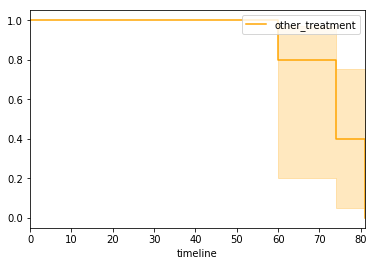

In [28]:
kmfs['other_treatment'].plot(color='orange')

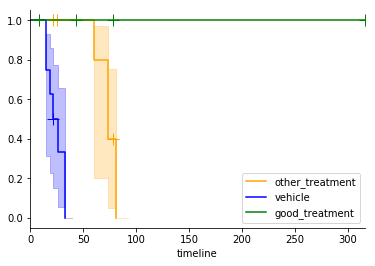

In [29]:
ax = matplotlib.pyplot.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

kmfs['other_treatment'].plot(show_censors=True,ax=ax,color='orange')
kmfs['vehicle'].plot(show_censors=True,ax=ax,color='blue')
kmfs['good_treatment'].plot(show_censors=True,ax=ax,color='green')


## Statistics with lifelines
The [lifelines package](http://lifelines.readthedocs.org) has two built in statistical tests, the log rank test and a multivariate log rank test.  The log rank test assesses the probability of observing two data sets (or more extremely different data) if all data is drawn from populations with the same endpoint generation process.  The multivariate test assess the probability of the observed or more extreme data if all observations are from the same endpoint generation process.

We need to convert the tumour volume data into a table of last observed time and whether the endpoint has been observed.  In the example above this was done 'under the hood' by the survivalvolume.plot.make_km function.

In [30]:
import pandas
from survivalvolume.plot import volume_to_survival

volume_to_survival(test_data['vehicle'],endpoint=700)

,Time,Observed
6661,19,True
6663,15,True
6664,26,True
6665,15,True
6666,22,True
6667,22,False
6668,33,True
6669,33,True


In [31]:
from lifelines.statistics import logrank_test, pairwise_logrank_test, multivariate_logrank_test

vehicle_survival = volume_to_survival(test_data['vehicle'],endpoint=700)
good_treatment_survival = volume_to_survival(test_data['good_treatment'],endpoint=700)
other_treatment_survival = volume_to_survival(test_data['other_treatment'],endpoint=700)

result = logrank_test(list(vehicle_survival['Time']),
                      list(other_treatment_survival['Time']),
                      list(vehicle_survival['Observed']),
                      list(other_treatment_survival['Observed']),
                     alpha=0.95)
result.print_summary()

Results
   t 0: -1
   test: logrank
   alpha: 0.95
   null distribution: chi squared
   df: 1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00059 |             11.808 |      Reject Null    |        True       


# Building Dual Volume and Survival Plots
VolumeSurvivalPlot is a class where additions of means are applied to both a tumour volume plot and a Kaplan-Meier plot.

Note that drawstyle steps required for correct rendering of the Kaplan-Meier chart was not implemented until mpld3/mpld3#350 in mpld3 0.3git (August 2016).  Full support will not be available until mpld3 v0.3 is released in late 2016.  Until this time only static matplotlib plots will render correctly.

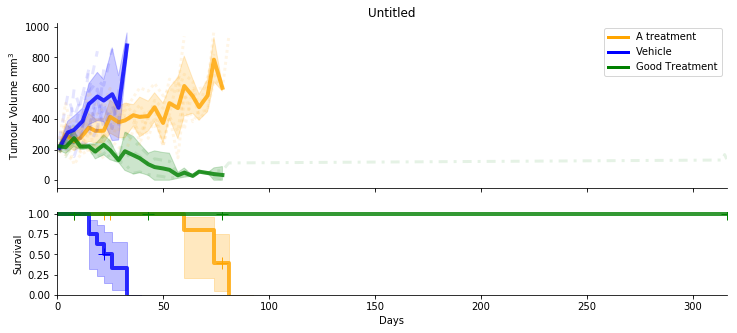

In [32]:
from survivalvolume.plot import VolumeSurvivalPlot

dual = VolumeSurvivalPlot(figsize=(12,5))
dual.add_mean('A treatment',test_data['other_treatment'],color='orange')
dual.add_individuals('A treatment',test_data['other_treatment'],color='orange', dashes = [1,1])
dual.add_interval('A treatment',test_data['other_treatment'],color='orange')

dual.add_mean('Vehicle',test_data['vehicle'],color='blue')
dual.add_individuals('Vehicle',test_data['vehicle'],color='blue', dashes = [3,3])
dual.add_interval('Vehicle',test_data['vehicle'],color='blue')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.display(use_mpld3=False)

Using the matplotlib display back end you can't re-display a figure so the following constructs the whole plot again rather than adding to the plot like we did in previous examples

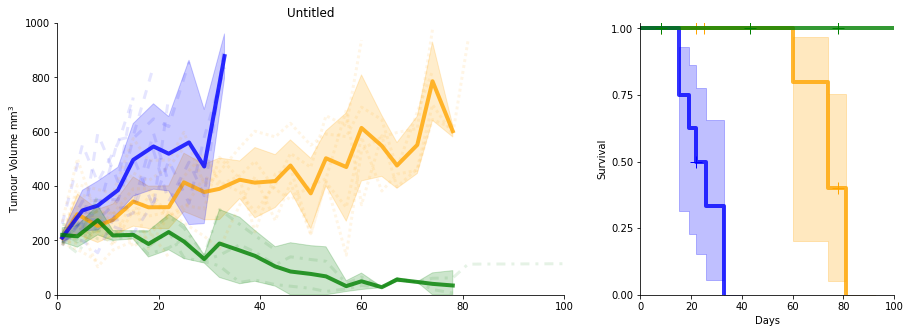

In [33]:
dual = VolumeSurvivalPlot(figsize=(15,5),vertical=False)
dual.add_mean('A treatment',test_data['other_treatment'],color='orange')
dual.add_individuals('A treatment',test_data['other_treatment'],color='orange', dashes = [1,1])
dual.add_interval('A treatment',test_data['other_treatment'],color='orange')

dual.add_mean('Vehicle',test_data['vehicle'],color='blue')
dual.add_individuals('Vehicle',test_data['vehicle'],color='blue', dashes = [3,3])
dual.add_interval('Vehicle',test_data['vehicle'],color='blue')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.xlim = [0,100]

dual.display(legend=False,use_mpld3=False)



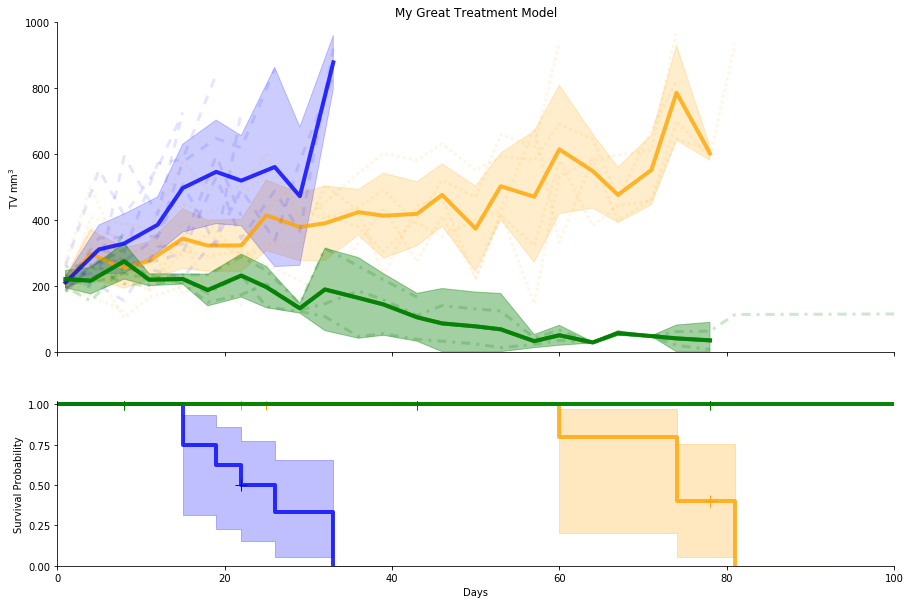

In [34]:
dual = VolumeSurvivalPlot(figsize=(15,10), km_size=0.5)
dual.add_mean('A treatment',test_data['other_treatment'],color='orange')
dual.add_individuals('A treatment',test_data['other_treatment'],color='orange', dashes = [1,1])
dual.add_interval('A treatment',test_data['other_treatment'],color='orange')

dual.add_mean('Vehicle',test_data['vehicle'],color='blue')
dual.add_individuals('Vehicle',test_data['vehicle'],color='blue', dashes = [3,3])
dual.add_interval('Vehicle',test_data['vehicle'],color='blue')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.xlim = [0,100]
dual.title = 'My Great Treatment Model'
dual.ylabel = 'TV mm$^{3}$'
dual.km_ylabel = 'Survival Probability'


dual.display(legend=False,use_mpld3=False)



In [36]:
dual.save_pdf('dual_plot.pdf')

In [35]:
dual = VolumeSurvivalPlot(figsize=(15,10), km_size=0.5)
dual.add_mean('A treatment',test_data['other_treatment'],color='orange')
dual.add_individuals('A treatment',test_data['other_treatment'],color='orange', dashes = [1,1])
dual.add_interval('A treatment',test_data['other_treatment'],color='orange')

dual.add_mean('Vehicle',test_data['vehicle'],color='blue')
dual.add_individuals('Vehicle',test_data['vehicle'],color='blue', dashes = [3,3])
dual.add_interval('Vehicle',test_data['vehicle'],color='blue')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.xlim = [0,100]
dual.title = 'My Great Treatment Model'
dual.ylabel = 'TV mm$^{3}$'
dual.km_ylabel = 'Survival Probability'


dual.display(use_mpld3=True)
dual.save_html('dual_plot.html')

In the vertically stacked plot we usually hide the x axis tick labels on the volume plot to get a cleaner plot.  You can toggle this behaviour with the hide_volume_labels display option

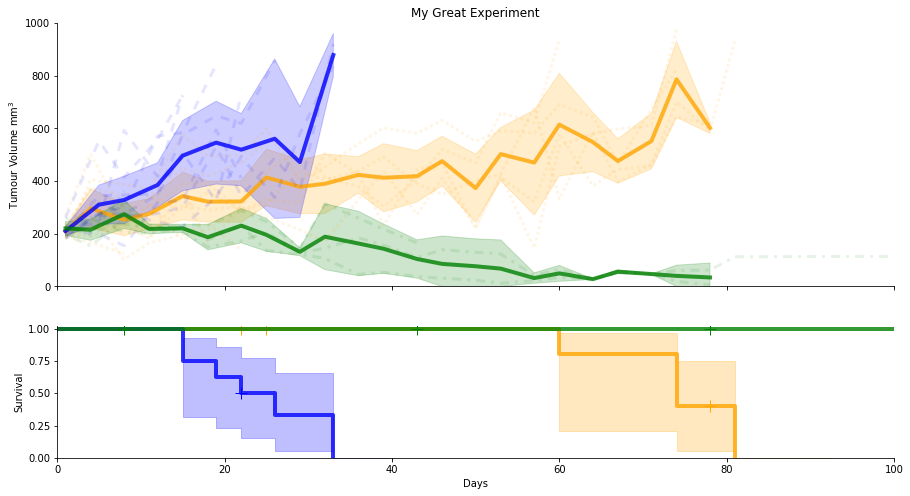

In [37]:
dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'],color='orange')
dual.add_individuals('A treatment',test_data['other_treatment'],color='orange', dashes = [1,1])
dual.add_interval('A treatment',test_data['other_treatment'],color='orange')

dual.add_mean('Vehicle',test_data['vehicle'],color='blue')
dual.add_individuals('Vehicle',test_data['vehicle'],color='blue', dashes = [3,3])
dual.add_interval('Vehicle',test_data['vehicle'],color='blue')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.title = 'My Great Experiment'
dual.xlim = [0,100]
dual.display(legend=False, hide_volume_labels = False, use_mpld3=False)


km_ci_show, the flag for displaying confidence intervals in the Kaplan-Meier plot, and km_show_censors, the flag for displaying censored individuals, both need to be set prior to the addition of data.
Data is plotted in the order it is added, which will determine which line overplots at the top of the Kaplan-Meier plot.

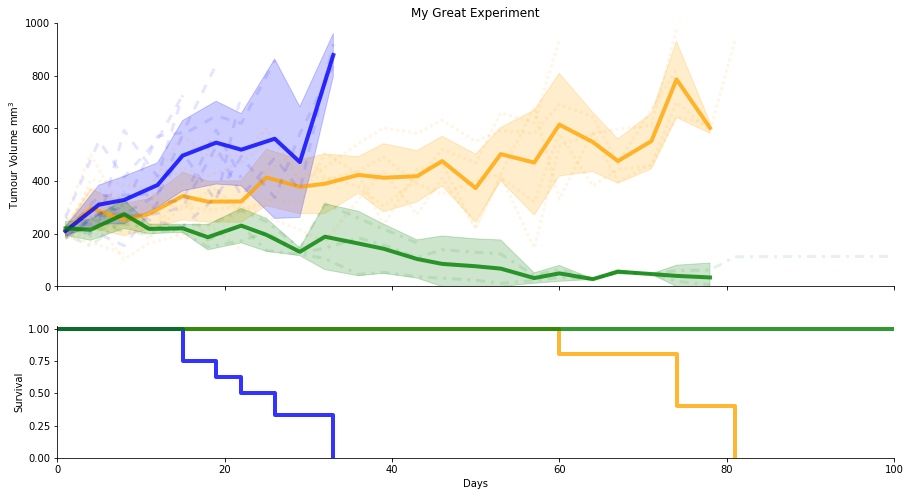

In [41]:
dual = VolumeSurvivalPlot(figsize=(15,8))

dual.km_show_censors = False
dual.km_ci_show = False

dual.add_mean('A treatment',test_data['other_treatment'],color='orange')
dual.add_individuals('A treatment',test_data['other_treatment'],color='orange', dashes = [1,1])
dual.add_interval('A treatment',test_data['other_treatment'],color='orange')

dual.add_mean('Vehicle',test_data['vehicle'],color='blue')
dual.add_individuals('Vehicle',test_data['vehicle'],color='blue', dashes = [3,3])
dual.add_interval('Vehicle',test_data['vehicle'],color='blue')

dual.add_mean('Good Treatment',test_data['good_treatment'],color='green')
dual.add_individuals('Good Treatment',test_data['good_treatment'],color='green', dashes = [1,2,3,2])
dual.add_interval('Good Treatment',test_data['good_treatment'],color='green')

dual.title = 'My Great Experiment'
dual.xlim = [0,100]


dual.display(legend=False, hide_volume_labels = False)

## Statistics on dual plot object
You can do a pairwise log rank test on the dual plot object referencing the name given to the mean.  We do not do all possible pairwise as this would incur a greater multiple testing penalty.  The results of selected tests are calculated manually and then subsequently will need to be corrected for multiple testing

In [42]:
print('Available to test are:', dual.volume_data.keys())

a = dual.logrank_test('Vehicle', 'Good Treatment')

Available to test are: dict_keys(['A treatment', 'Vehicle', 'Good Treatment'])
Results
   t 0: -1
   test: logrank
   alpha: 0.95
   null distribution: chi squared
   df: 1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.01330 |              6.129 |      Reject Null    |        True       


# Advanced tricks
When you are doing lots of plots you may wish to set defaults that you can reuse and change once, rather than having to update line styles across lots of individual plots.  This can be acchieved with dictionary unpacking using the \*\*dict notation

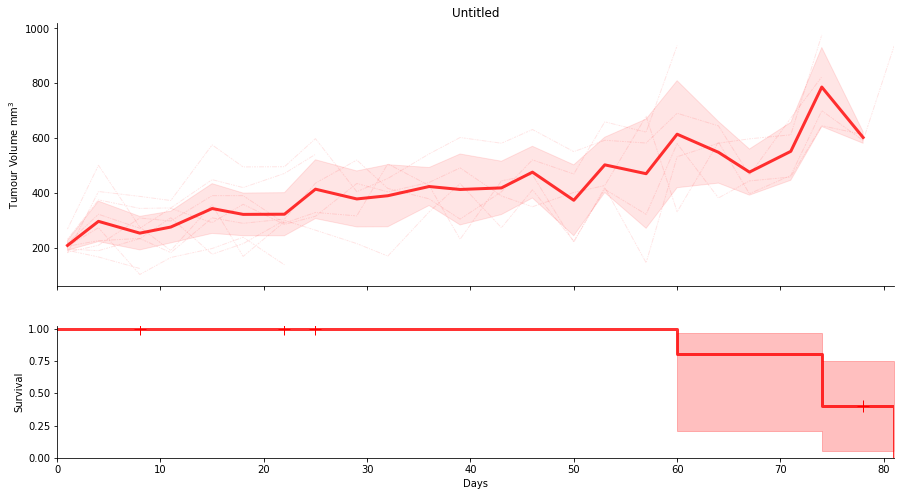

In [43]:
#You can change these definitions here and all the following plots will update in style
other_treatment_mean = {'color':'red','lw':3}
other_treatment_interval = {'color':'red', 'alpha':0.1}
other_treatment_individuals = {'color':'red','lw':1,'dashes':[2,1,1,1,5,1,1,1]}

dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.display(legend=False, use_mpld3=False)



## Annotations

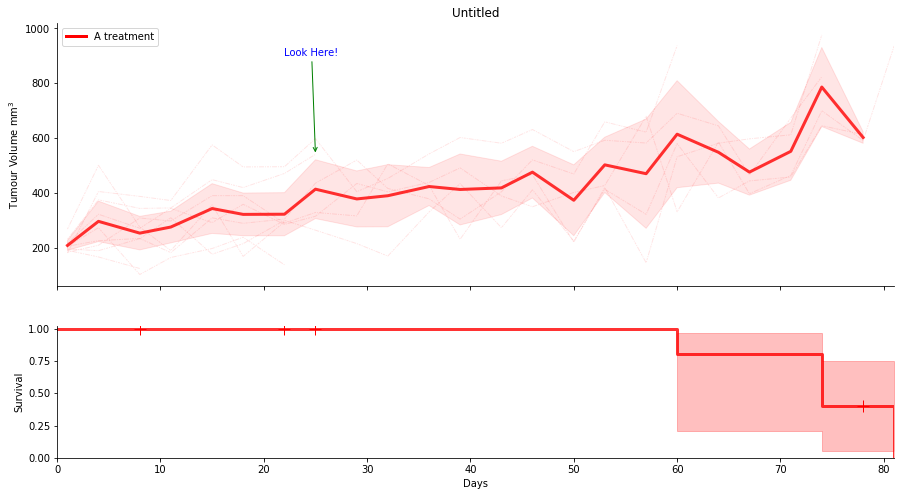

In [44]:
dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.display(legend=False)

dual.ax.annotate("Look Here!",
            xy=(25, 540), xycoords='data',
            xytext=(22, 900), textcoords='data',
            arrowprops=dict(arrowstyle="->",color='green'),
            color='blue')

#arrows are not supported by mpld3 v0.3git
dual.display(use_mpld3=False)

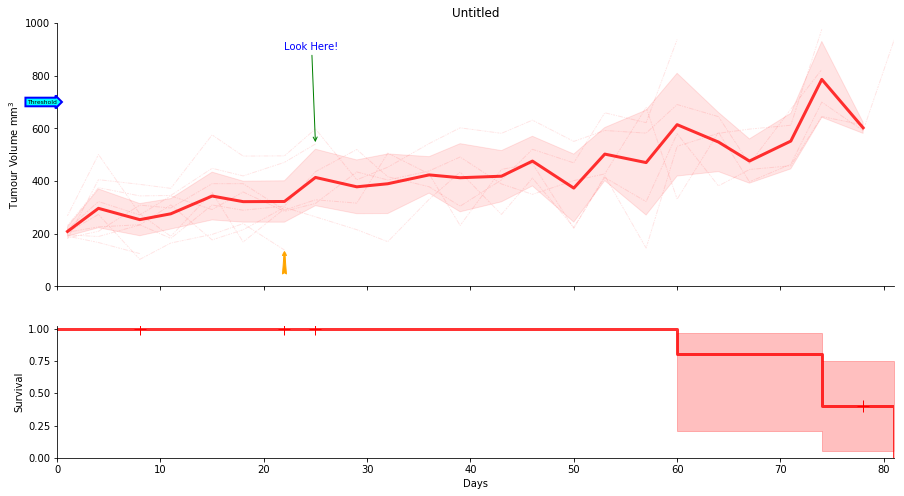

In [45]:
dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.ylim = [0,1000]
dual.ax.annotate("Look Here!",
            xy=(25, 540), xycoords='data',
            xytext=(22, 900), textcoords='data',
            arrowprops=dict(arrowstyle="->",color='green'),
            color='blue')

dual.ax.annotate('',
            xy=(22, 140), xycoords='data',
            xytext=(22, 40), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",color='orange'),
            color='blue')


dual.ax.text(0, 700, "Threshold", ha="right", va="center", rotation=0,
            size=6,
            bbox=dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2))

#arrows are not supported by mpld3 v0.3git
dual.display(legend=False, use_mpld3=False)

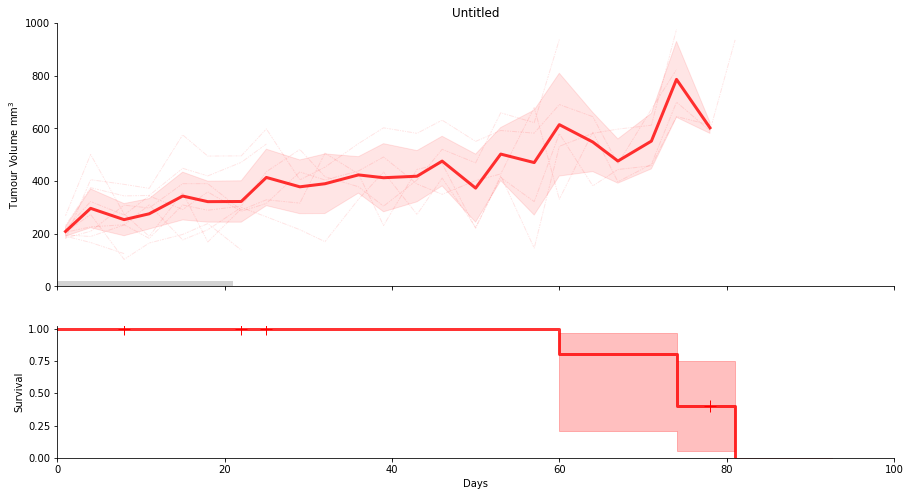

In [46]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.ylim = [0,1000]
dual.xlim = [0,100]


dual.ax.add_patch(Rectangle((0, 0), 21, 20, facecolor="lightgrey",lw=0))
dual.display(legend=False, use_mpld3=False)

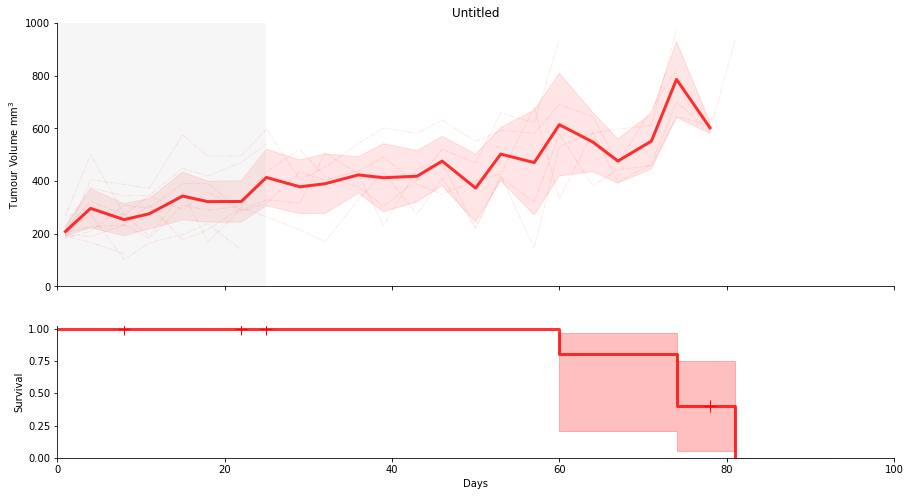

In [47]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.ylim = [0,1000]
dual.xlim = [0,100]

dual.shade_interval(0,25)
dual.display(legend=False, use_mpld3=False)

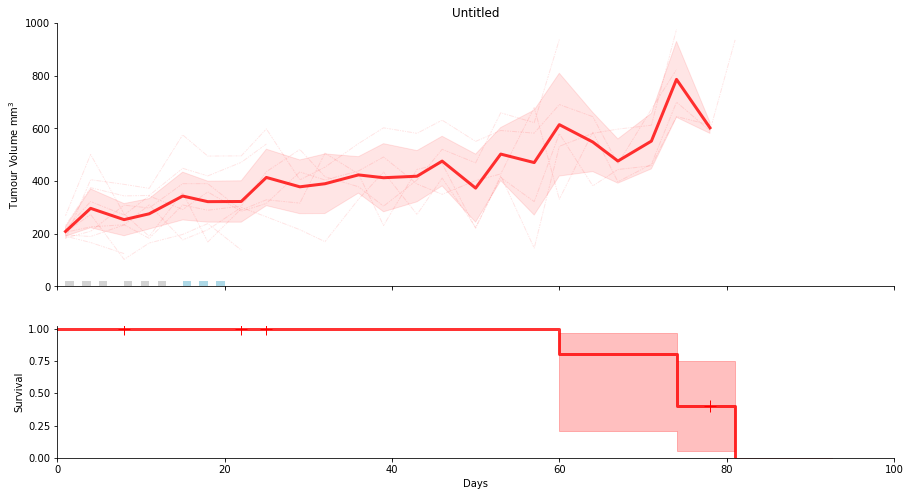

In [48]:
dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.ylim = [0,1000]
dual.xlim = [0,100]

dual.show_treatment_days([1,3,5,8,10,12,], facecolor="lightgrey")
dual.show_treatment_days([15,17,19], facecolor="lightblue")

dual.display(legend=False, use_mpld3=False)

## Annotate with horizontal and vertical lines

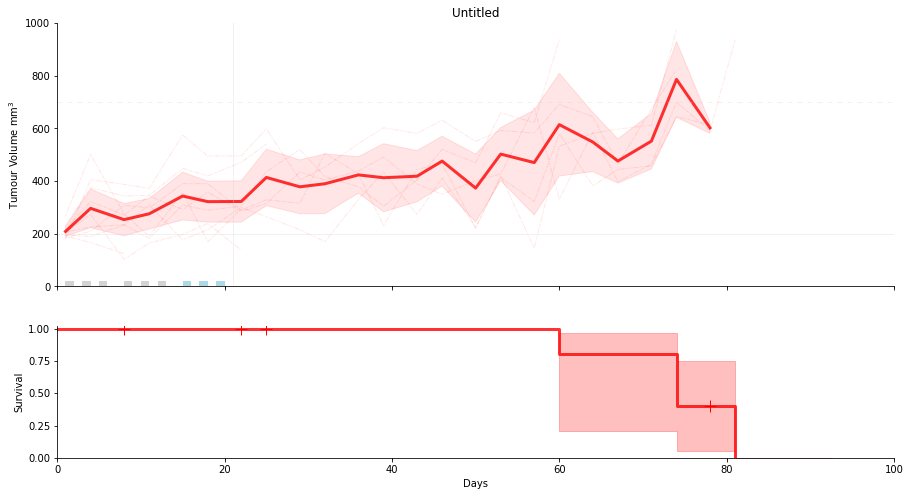

In [49]:
dual = VolumeSurvivalPlot(figsize=(15,8))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.ylim = [0,1000]
dual.xlim = [0,100]

dual.ax.axhline(700,color='lightgrey',lw=1,alpha=0.3,dashes=[5,5])
dual.ax.axhline(200,color='lightgrey',lw=1,alpha=0.3)

dual.ax.axvline(21,color='lightgrey',lw=1,alpha=0.3)

dual.show_treatment_days([1,3,5,8,10,12,], facecolor="lightgrey")
dual.show_treatment_days([15,17,19], facecolor="lightblue")

dual.display(legend=False)

## Sizes in cm, fontsize and exporting to Illustrator

You can save as an adobe Illustrator compatible pdf and open in Illustrator.

Note that opening in Illustrator will not preserve line dashes.  You can place the pdf in Illustrator or Indesign, or open in other pdf viewers and maintain the dashes.



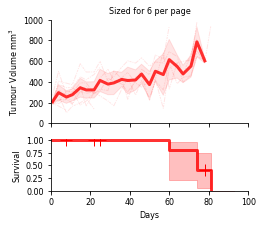

In [50]:
def cm2inch(cm):
    return cm/2.54

dual = VolumeSurvivalPlot(figsize=(cm2inch(9),cm2inch(8)))
dual.add_mean('A treatment',test_data['other_treatment'], **other_treatment_mean)
dual.add_individuals('A treatment',test_data['other_treatment'], **other_treatment_individuals)
dual.add_interval('A treatment',test_data['other_treatment'], **other_treatment_interval)

dual.ylim = [0,1000]
dual.xlim = [0,100]

dual.fontsize = 8

dual.title = 'Sized for 6 per page'

#save as an adobe illustrator compatible pdf and open in Illustrator
dual.save_pdf('sized6perpage.ai', legend=False)

#!open sized6perpage.ai

